In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import math
import glob
import os
import random
import seaborn as sns
import matplotlib.pyplot as plt

import re
import sys
import warnings

warnings.filterwarnings("ignore")

In [2]:
print("pd version: " + pd.__version__)
print("np version: " + np.__version__)

pd version: 1.2.4
np version: 1.19.5


In [3]:
def seed_everything(seed=0):
    random.seed(seed)
    os.environ['PYTHONHASHED'] = str(seed)
    np.random.seed(seed)

SEED = 42
seed_everything(SEED)

In [4]:
root = r'~/Documents/GitHub/dataset/경로당.csv'

In [5]:
df = pd.read_csv(root)
df

,timedate,serial,pm01_raw,pm25_raw,pm10_raw,temp,humi,co2,voc,noise,...,pm01,cici_pm10,cici_pm25,cici_co2,cici_voc,cici_temp,cici_humi,cici_noise,cici,ciai
0,2021-01-25 14:40:00,ICL1L2000238,18.0,10.0,18.0,10.0,18.0,18.0,-9999.0,-9999.0,...,-9999.0,94.0,93.0,0.0,80.0,80.0,80.0,80.0,57.0,53.0
1,2021-01-25 14:41:00,ICL1L2000238,17.0,10.0,17.0,10.0,17.0,17.0,724.0,5865.0,...,34.0,94.0,93.0,85.0,23.0,81.0,77.0,82.0,64.0,64.0
2,2021-01-25 14:42:00,ICL1L2000238,18.0,10.0,17.0,10.0,18.0,17.0,689.0,6549.0,...,33.0,94.0,93.0,86.0,19.0,84.0,75.0,82.0,62.0,62.0
3,2021-01-25 14:44:00,ICL1L2000239,24.0,13.0,21.0,13.0,24.0,21.0,-9999.0,-9999.0,...,-9999.0,92.0,91.0,0.0,80.0,80.0,80.0,80.0,57.0,53.0
4,2021-01-25 14:45:00,ICL1L2000239,23.0,12.0,20.0,12.0,23.0,20.0,693.0,4992.0,...,33.0,92.0,92.0,86.0,27.0,83.0,75.0,80.0,65.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8820558,2021-07-01 23:59:00,ICL1L2000274,2.0,1.0,2.0,1.0,2.0,2.0,475.0,950.0,...,52.0,99.0,99.0,91.0,52.0,70.0,98.0,83.0,82.0,79.0
8820559,2021-07-01 23:59:00,ICL1L2000277,24.0,14.0,24.0,14.0,24.0,24.0,445.0,0.0,...,54.0,92.0,91.0,91.0,100.0,76.0,96.0,80.0,96.0,93.0
8820560,2021-07-01 23:59:00,ICL1L2000244,22.0,13.0,22.0,13.0,22.0,22.0,626.0,4306.0,...,53.0,93.0,91.0,87.0,31.0,81.0,97.0,82.0,74.0,67.0
8820561,2021-07-01 23:59:00,ICL1L2000249,31.0,18.0,30.0,18.0,31.0,30.0,516.0,1387.0,...,58.0,89.0,88.0,89.0,47.0,82.0,92.0,82.0,79.0,72.0


In [15]:
data = df

In [17]:
serial_set = sorted(set(data['serial']))
total = 0

for serial_num in serial_set:
    print("number of Serial: " + str(serial_num) + " is " + str(len(data[data['serial']==serial_num])))
    total += len(data[data['serial']==serial_num])

print(total)

number of Serial: ICL1L2000234 is 156344
number of Serial: ICL1L2000235 is 217364
number of Serial: ICL1L2000236 is 217936
number of Serial: ICL1L2000237 is 217356
number of Serial: ICL1L2000238 is 196729
number of Serial: ICL1L2000239 is 216704
number of Serial: ICL1L2000240 is 216829
number of Serial: ICL1L2000241 is 216742
number of Serial: ICL1L2000242 is 217690
number of Serial: ICL1L2000243 is 26823
number of Serial: ICL1L2000244 is 216756
number of Serial: ICL1L2000245 is 216879
number of Serial: ICL1L2000246 is 217077
number of Serial: ICL1L2000247 is 216740
number of Serial: ICL1L2000248 is 208277
number of Serial: ICL1L2000249 is 216850
number of Serial: ICL1L2000250 is 4590
number of Serial: ICL1L2000251 is 41841
number of Serial: ICL1L2000252 is 216948
number of Serial: ICL1L2000253 is 217200
number of Serial: ICL1L2000254 is 216712
number of Serial: ICL1L2000255 is 216552
number of Serial: ICL1L2000256 is 14387
number of Serial: ICL1L2000257 is 87446
number of Serial: ICL1

In [25]:
array = []
for serial_num in serial_set:
    array += [[serial_num[9:], len(data[data['serial']==serial_num])]]

df2 = pd.DataFrame(array, columns = ['serial', 'num'])
df2

,serial,num
0,234,156344
1,235,217364
2,236,217936
3,237,217356
4,238,196729
5,239,216704
6,240,216829
7,241,216742
8,242,217690
9,243,26823


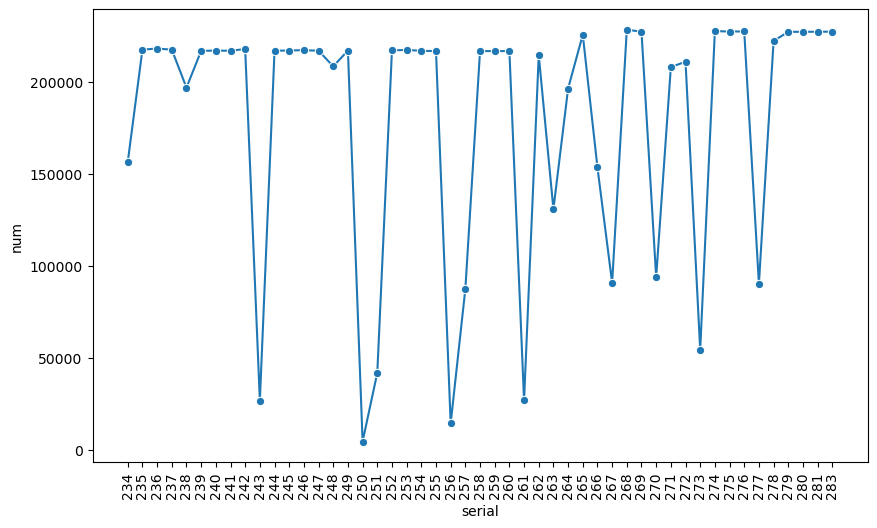

In [39]:
fig, scatter = plt.subplots(figsize = (10, 6), dpi = 100)
sns.lineplot(data = df2, x = 'serial', y = 'num', marker = 'o')

plt.xticks(rotation = "90")
plt.show()